In [88]:
%pip install --upgrade scikit-learn
%pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
      --------------------------------------- 0.1/7.6 MB 2.2 MB/s eta 0:00:04
     - -------------------------------------- 0.2/7.6 MB 2.3 MB/s eta 0:00:04
     - -------------------------------------- 0.3/7.6 MB 2.3 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/7.6 MB 2.6 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/7.6 MB 3.1 MB/s eta 0:00:03
     ------ --------------------------------- 1.2/7.6 MB 4.2 MB/s eta 0:00:02
     ------- -------------------------------- 1.4/7.6 MB 4.1 MB/s eta 0:00:02
     -------- ------------------------------- 1.5/7.6 MB 4.1 MB/s eta 0:00:02
     -------- ------------------------------- 1.5/7.6 MB 4.1 MB/s eta 0:00:02
     -------- ------------------------------- 1.5/7.6 MB 4.1 MB/s eta 0:00:02
     -------- ------------------------------- 1.6/7.6 MB 3.1 MB/s eta 0:00:02
     --------- ------------------------------ 1.8/7.6 MB 3.2 MB/s eta 0

In [92]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##Read the data

In [93]:
# data = pd.read_csv("data.csv",usecols=["TA_Speaker_1_2","Course_instructor_25","Course_categ_26","Sem_1sum_2reg","class_size","categ_1l_2m_3h"])
data = pd.read_csv('data.csv',header=None)
data.columns = ["TA_Speaker_1_2","Course_instructor_25","Course_categ_26","Sem_1sum_2reg","class_size","categ_1l_2m_3h"]
data.head(5)

,TA_Speaker_1_2,Course_instructor_25,Course_categ_26,Sem_1sum_2reg,class_size,categ_1l_2m_3h
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [94]:
data.describe()

,TA_Speaker_1_2,Course_instructor_25,Course_categ_26,Sem_1sum_2reg,class_size,categ_1l_2m_3h
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TA_Speaker_1_2        151 non-null    int64
 1   Course_instructor_25  151 non-null    int64
 2   Course_categ_26       151 non-null    int64
 3   Sem_1sum_2reg         151 non-null    int64
 4   class_size            151 non-null    int64
 5   categ_1l_2m_3h        151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [96]:
##Find missing values
mis_values = data.isna().sum()
mis_values

TA_Speaker_1_2          0
Course_instructor_25    0
Course_categ_26         0
Sem_1sum_2reg           0
class_size              0
categ_1l_2m_3h          0
dtype: int64

In [97]:
##Find missing values of particular column 
mis_val_column = data['TA_Speaker_1_2'].isna().sum()
mis_val_column

0

In [98]:
data["categ_1l_2m_3h"]

0      3
1      3
2      3
3      3
4      3
      ..
146    1
147    1
148    1
149    1
150    1
Name: categ_1l_2m_3h, Length: 151, dtype: int64

In [99]:
##Select features
features = ["TA_Speaker_1_2","Course_instructor_25","Course_categ_26","Sem_1sum_2reg","class_size"]
X = data[features]
y = data["categ_1l_2m_3h"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)


In [100]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
from sklearn.naive_bayes import GaussianNB

# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [102]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.7096774193548387
Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.82      0.69        11
           2       0.80      0.44      0.57         9
           3       0.82      0.82      0.82        11

    accuracy                           0.71        31
   macro avg       0.74      0.69      0.69        31
weighted avg       0.74      0.71      0.70        31



In [103]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7096774193548387
Precision: 0.7393939393939394
Recall: 0.6936026936026937
F1 score: 0.693972693972694


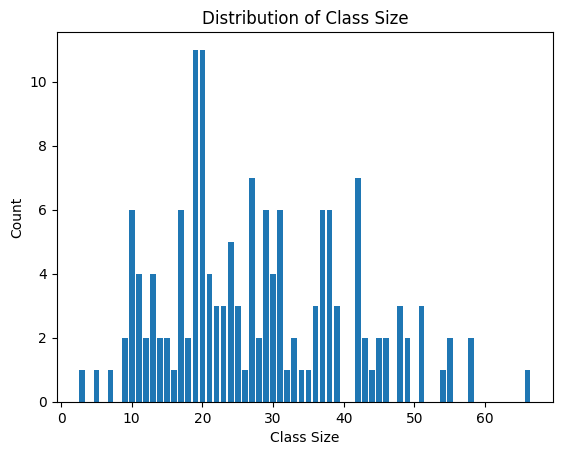

In [104]:
import matplotlib.pyplot as plt

# Create a bar chart of the class_size variable
class_size_counts = data['class_size'].value_counts()
plt.bar(class_size_counts.index, class_size_counts.values)

# Add labels and title
plt.xlabel('Class Size')
plt.ylabel('Count')
plt.title('Distribution of Class Size')

# Show the plot
plt.show()


In [105]:
##Save the model
import pickle
with open("naive_bayes_model.pkl","wb") as file:
    pickle.dump(model,file)